In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering




In [27]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df['species'] = iris.target

In [29]:
X = df.drop('species', axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

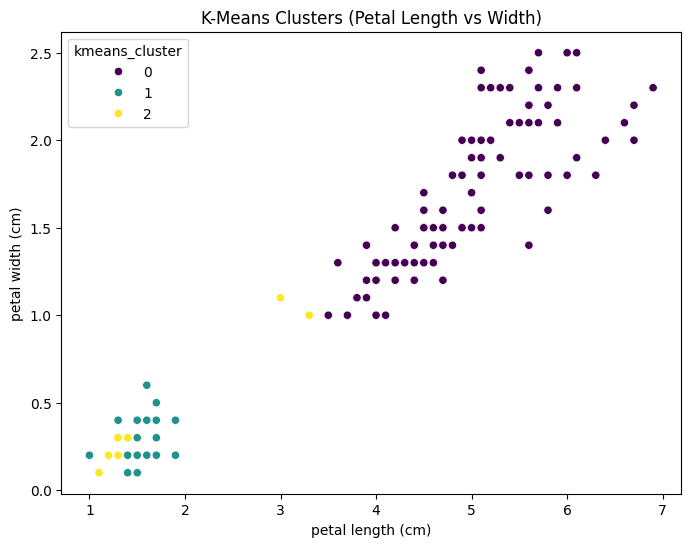

In [31]:
#Using KMeans bcoz this dataset has clear numeric features and naturally separable clusters.
#Visualization show three well separated clusters based on petal length and width..
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = kmeans_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['kmeans_cluster'],
    palette='viridis'
)
plt.title("K-Means Clusters (Petal Length vs Width)")
plt.show()


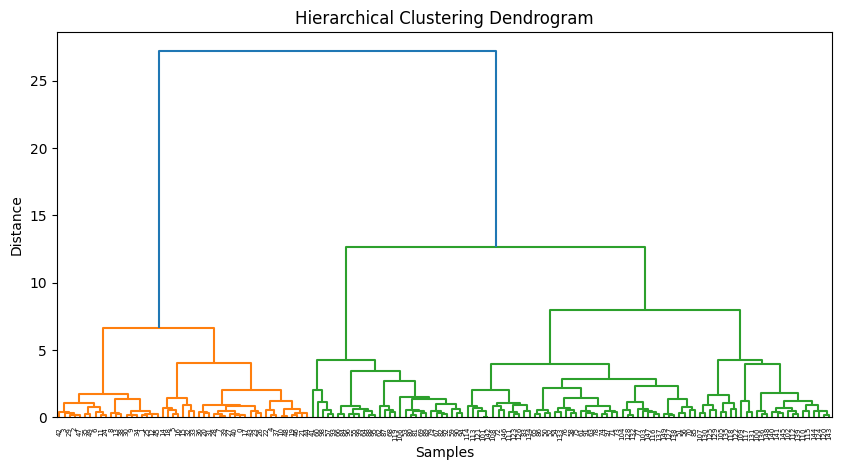

In [32]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#HC suits bcoz dataset is small and natural grouping can be easily visualized through dendrogram.

In [33]:

hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_scaled)

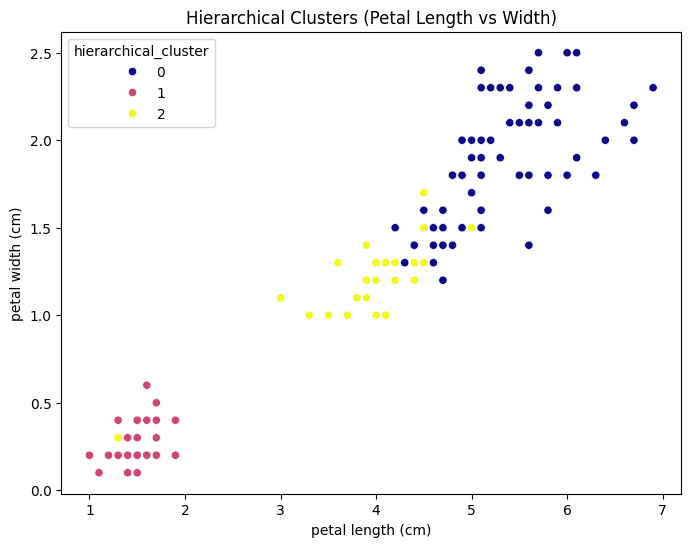

In [34]:
df['hierarchical_cluster'] = hc_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['hierarchical_cluster'],
    palette='plasma'
)
plt.title("Hierarchical Clusters (Petal Length vs Width)")
plt.show()
